## USP - EACH - SIN5007 - Reconhecimento de Padrões - 1º SEM 2020

## Classificação de Modelos cardíacos tridimensionais relacionada à presença ou ausência de cardimiopatia


**Grupo H(8):** <br />
Diego Dedize <br />
Luiz Gustavo Silva <br />
Johnny Demetrius <br />
Vagner Mendonça Gonçalves <br />

version 0.1 - 03/04/2020

**Objetivo:** aplicar modelos de classificação  e avaliar os resultados obtidos em um dataset composto por vetores de características extraídas de modelos 3D reconstruídos a partir de exames de Ressonancia Magnética Cardíaca (RMC).

**Cardiomiopatia:** quadro clínico dado por uma anormalidade no miocárdio (estrutura muscular do coração) (KUMAR et al., 2010 apud BERGAMASCO, 2018).

**Fonte dos dados:** Dataset disponibilizado pelo Laboratório de Aplicações de Informática em Saúde (LApIS) - EACH/USP, coordenado pela Profa. Dra. Fátima L. S. Nunes.

**Referências:** <br />
BERGAMASCO, Leila Cristina Carneiro. Recuperação de imagens cardíacas tridimensionais por conteúdo. 2013. 134 f. Dissertação (Mestrado em Ciências) - Programa de Pós-graduação em Sistemas de Informação, Escola de Artes, Ciências e Humanidades, Universidade de São Paulo, São Paulo, 2013. 

BERGAMASCO, Leila Cristina Carneiro. Recuperação de objetos médicos 3D utilizando harmônicos esféricos e redes de fluxo. 2018. 181 f. Tese (Doutorado em Ciências) - Escola Politécnica, Departamento de Engenharia da Computação e Sistemas Digitais, Universidade de São Paulo, São Paulo, 2018.

KUMAR, V.; ABBAS, A. K.; FAUSTO, N.; ASTER, J. C.. Robbins & Cotran – Patologia: Bases Patológicas das Doenças. 8 ed. Rio de Janeiro: Elsevier, 2010.


# Importanto bibliotecas importantes

In [60]:
%matplotlib inline
import warnings
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import missingno as msno

warnings.simplefilter(action='ignore', category=FutureWarning)

# Importando arquivos

## Carregando arquivos Detalhado Houg 45

In [61]:
df_hEndo = pd.read_csv("Projeto/HOUGH/Hough45Endo_01_20200412.txt",header=None)

# df_hEndo.head(3)
# df_hEndo.columns
# df_hEndo[1408].value_counts()

#Faz loop para nomear colunas 
colunas_2 = []
for i in range(1,1409):
     colunas_2.append('hEndo45_' + str(i))

#Essa é a coluna das classes: Normal, CDM, CMH
coluna_1 = ['id']

#Ajusta o nome do dataset
colunas_total = coluna_1 + colunas_2 
colunas_total
df_hEndo.columns = colunas_total
df_hEndo.head(3)

#msno.matrix(df_hEndo)

,id,hEndo45_1,hEndo45_2,hEndo45_3,hEndo45_4,hEndo45_5,hEndo45_6,hEndo45_7,hEndo45_8,hEndo45_9,...,hEndo45_1399,hEndo45_1400,hEndo45_1401,hEndo45_1402,hEndo45_1403,hEndo45_1404,hEndo45_1405,hEndo45_1406,hEndo45_1407,hEndo45_1408
0,id001,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0
1,id002,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0
2,id003,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0


In [62]:
df_hEpi = pd.read_csv("Projeto/HOUGH/Hough45Epi_01_20200412.txt",header=None)

# df_hEpi.head(3)
# df_hEpi.columns
#df_hEpi[1408].value_counts()

#Faz loop para nomear colunas 
colunas_2 = []
for i in range(1,1409):
     colunas_2.append('hEpi45_' + str(i))

#Essa é a coluna das classes: Normal, CDM, CMH
coluna_1 = ['id']

#Ajusta o nome do dataset
colunas_total = coluna_1 + colunas_2 
colunas_total
df_hEpi.columns = colunas_total
df_hEpi.head(3)

#msno.matrix(df_hEpi)

,id,hEpi45_1,hEpi45_2,hEpi45_3,hEpi45_4,hEpi45_5,hEpi45_6,hEpi45_7,hEpi45_8,hEpi45_9,...,hEpi45_1399,hEpi45_1400,hEpi45_1401,hEpi45_1402,hEpi45_1403,hEpi45_1404,hEpi45_1405,hEpi45_1406,hEpi45_1407,hEpi45_1408
0,id001,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0
1,id002,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0
2,id003,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0


In [63]:
df_hPar = pd.read_csv("Projeto/HOUGH/Hough45Parede_01_20200412.txt",header=None)

#df_hPar.head(3)
#df_hPar.columns
#df_hPar[1408].value_counts()

#Faz loop para nomear colunas 
colunas_2 = []
for i in range(1,1409):
     colunas_2.append('hPar45_' + str(i))

#Essa é a coluna das classes: Normal, CDM, CMH
coluna_1 = ['id']

#Ajusta o nome do dataset
colunas_total = coluna_1 + colunas_2 
colunas_total
df_hPar.columns = colunas_total
df_hPar.head(3)

#msno.matrix(df_hPar)

,id,hPar45_1,hPar45_2,hPar45_3,hPar45_4,hPar45_5,hPar45_6,hPar45_7,hPar45_8,hPar45_9,...,hPar45_1399,hPar45_1400,hPar45_1401,hPar45_1402,hPar45_1403,hPar45_1404,hPar45_1405,hPar45_1406,hPar45_1407,hPar45_1408
0,id001,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0
1,id002,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0
2,id003,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0


### Consolida Arquivos Houg45

In [64]:
df_hTotal = pd.merge(df_hEndo,df_hEpi,on=['id'])
df_hTotal = pd.merge(df_hTotal,df_hPar,on=['id'])
df_hTotal.head(3)

,id,hEndo45_1,hEndo45_2,hEndo45_3,hEndo45_4,hEndo45_5,hEndo45_6,hEndo45_7,hEndo45_8,hEndo45_9,...,hPar45_1399,hPar45_1400,hPar45_1401,hPar45_1402,hPar45_1403,hPar45_1404,hPar45_1405,hPar45_1406,hPar45_1407,hPar45_1408
0,id001,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0
1,id002,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0
2,id003,0,0,0,0,0,0,1,0,0,...,8,0,3,7,9,0,3,7,10,0


In [65]:
df_hTotal.dtypes

id             object
hEndo45_1       int64
hEndo45_2       int64
hEndo45_3       int64
hEndo45_4       int64
                ...  
hPar45_1404     int64
hPar45_1405     int64
hPar45_1406     int64
hPar45_1407     int64
hPar45_1408     int64
Length: 4225, dtype: object

In [66]:
df_hTotal.columns

Index(['id', 'hEndo45_1', 'hEndo45_2', 'hEndo45_3', 'hEndo45_4', 'hEndo45_5',
       'hEndo45_6', 'hEndo45_7', 'hEndo45_8', 'hEndo45_9',
       ...
       'hPar45_1399', 'hPar45_1400', 'hPar45_1401', 'hPar45_1402',
       'hPar45_1403', 'hPar45_1404', 'hPar45_1405', 'hPar45_1406',
       'hPar45_1407', 'hPar45_1408'],
      dtype='object', length=4225)

## Carregando arquivos Detalhado Houg 90

In [67]:
df_hEndo90 = pd.read_csv("Projeto/HOUGH/Hough90Endo_01_20200412.txt",header=None)

# df_hEndo90.head(3)
# df_hEndo90.columns
# df_hEndo90[1408].value_counts()

#Faz loop para nomear colunas 
colunas_2 = []
for i in range(1,353):
     colunas_2.append('hEndo90_' + str(i))

#Essa é a coluna das classes: Normal, CDM, CMH
coluna_1 = ['id']

#Ajusta o nome do dataset
colunas_total = coluna_1 + colunas_2 
colunas_total
df_hEndo90.columns = colunas_total
df_hEndo90.head(3)

#msno.matrix(df_hEndo90)

,id,hEndo90_1,hEndo90_2,hEndo90_3,hEndo90_4,hEndo90_5,hEndo90_6,hEndo90_7,hEndo90_8,hEndo90_9,...,hEndo90_343,hEndo90_344,hEndo90_345,hEndo90_346,hEndo90_347,hEndo90_348,hEndo90_349,hEndo90_350,hEndo90_351,hEndo90_352
0,id001,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0
1,id002,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0
2,id003,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0


In [68]:
df_hEpi90 = pd.read_csv("Projeto/HOUGH/Hough90Epi_01_20200412.txt",header=None)

# df_hEpi90.head(3)
# df_hEpi90.columns
#df_hEpi90[1408].value_counts()

#Faz loop para nomear colunas 
colunas_2 = []
for i in range(1,353):
     colunas_2.append('hEpi90_' + str(i))

#Essa é a coluna das classes: Normal, CDM, CMH
coluna_1 = ['id']

#Ajusta o nome do dataset
colunas_total = coluna_1 + colunas_2 
colunas_total
df_hEpi90.columns = colunas_total
df_hEpi90.head(3)

#msno.matrix(df_hEpi)

,id,hEpi90_1,hEpi90_2,hEpi90_3,hEpi90_4,hEpi90_5,hEpi90_6,hEpi90_7,hEpi90_8,hEpi90_9,...,hEpi90_343,hEpi90_344,hEpi90_345,hEpi90_346,hEpi90_347,hEpi90_348,hEpi90_349,hEpi90_350,hEpi90_351,hEpi90_352
0,id001,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0
1,id002,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0
2,id003,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0


In [69]:
df_hPar90 = pd.read_csv("Projeto/HOUGH/Hough90Total_01_20200412.txt",header=None)

#df_hPar90.head(3)
#df_hPar90.columns
#df_hPar90[1408].value_counts()

#Faz loop para nomear colunas 
colunas_2 = []
for i in range(1,353):
     colunas_2.append('hPar90_' + str(i))

#Essa é a coluna das classes: Normal, CDM, CMH
coluna_1 = ['id']

#Ajusta o nome do dataset
colunas_total = coluna_1 + colunas_2 
colunas_total
df_hPar90.columns = colunas_total
df_hPar90.head(3)

#msno.matrix(df_hPar)

,id,hPar90_1,hPar90_2,hPar90_3,hPar90_4,hPar90_5,hPar90_6,hPar90_7,hPar90_8,hPar90_9,...,hPar90_343,hPar90_344,hPar90_345,hPar90_346,hPar90_347,hPar90_348,hPar90_349,hPar90_350,hPar90_351,hPar90_352
0,id001,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0
1,id002,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0
2,id003,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0


### Consolida Arquivos Houg90

In [70]:
df_hTotal90 = pd.merge(df_hEndo90,df_hEpi90,on=['id'])
df_hTotal90 = pd.merge(df_hTotal90,df_hPar90,on=['id'])
df_hTotal90.head(3)

,id,hEndo90_1,hEndo90_2,hEndo90_3,hEndo90_4,hEndo90_5,hEndo90_6,hEndo90_7,hEndo90_8,hEndo90_9,...,hPar90_343,hPar90_344,hPar90_345,hPar90_346,hPar90_347,hPar90_348,hPar90_349,hPar90_350,hPar90_351,hPar90_352
0,id001,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0
1,id002,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0
2,id003,0,0,0,0,0,0,1,0,0,...,8,0,1,3,9,0,1,3,10,0


## Carregando arquivos Soma SPHARM

In [71]:
df_endo = pd.read_csv("Projeto/SPHARMs/SomaEndoSPHARM_01_20200412.txt",header=None)
colunas = ['id','soma_endo']
df_endo.columns = colunas
df_endo.head(3)

,id,soma_endo
0,id001,-3.809996e+06
1,id002,1.973591e+05
2,id003,-3.196860e+00


In [72]:
df_epi = pd.read_csv("Projeto/SPHARMs/SomaEpiSPHARM_01_20200412.txt",header=None)
colunas = ['id','soma_epi']
df_epi.columns = colunas
df_epi.head(3)

,id,soma_epi
0,id001,-2.304811e+06
1,id002,1.108307e+05
2,id003,8.881557e+06


In [73]:
df_parede = pd.read_csv("Projeto/SPHARMs/SomaParedeSPHARM_01_20200412.txt",header=None)
colunas = ['id','soma_parede']
df_parede.columns = colunas
df_parede.head(3)

,id,soma_parede
0,id001,-1.769105e+06
1,id002,2.451851e+05
2,id003,-1.306913e+06


In [74]:
df_total = pd.merge(df_endo,df_epi,on=['id'])
df_total_soma = pd.merge(df_total,df_parede,on=['id'])
df_total_soma.head(3)

,id,soma_endo,soma_epi,soma_parede
0,id001,-3.809996e+06,-2.304811e+06,-1.769105e+06
1,id002,1.973591e+05,1.108307e+05,2.451851e+05
2,id003,-3.196860e+00,8.881557e+06,-1.306913e+06


# Carregando arquivos SPHARM Detalhados

### Ajustando cabeçalho

In [75]:
df_inicial = pd.read_csv("Total_SPHARM_20200326.csv",header=None)
df_inicial.head(3)

,0,1,2,3,4,5,6,7,8,9,...,707,708,709,710,711,712,713,714,715,716
0,id001,29,M,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.37807,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id002,31,M,-567.772697,-33.292309,-465.179132,-525.981010,-469.54690,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id003,27,M,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.25501,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [76]:
df_inicial.shape

(400, 717)

In [77]:
df_inicial.columns

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            707, 708, 709, 710, 711, 712, 713, 714, 715, 716],
           dtype='int64', length=717)

In [78]:
colunas_1 =['id','age','sex']
colunas_1

['id', 'age', 'sex']

In [79]:
#Faz loop para nomear coluna de coeficientes harmônicos
colunas_2 = []
for i in range(1,714):
     colunas_2.append('Spharm_' + str(i))

In [80]:
#Essa é a coluna das classes: Normal, CDM, CMH
coluna_3 = ['class_id']

In [82]:
#Ajusta o nome do dataset
colunas_total = colunas_1 + colunas_2 + coluna_3

df_inicial.columns = colunas_total
df_inicial.head(3)

,id,age,sex,Spharm_1,Spharm_2,Spharm_3,Spharm_4,Spharm_5,Spharm_6,Spharm_7,...,Spharm_705,Spharm_706,Spharm_707,Spharm_708,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713,class_id
0,id001,29,M,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.37807,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id002,31,M,-567.772697,-33.292309,-465.179132,-525.981010,-469.54690,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id003,27,M,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.25501,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Ajusta idade

In [83]:
df_inicial.isnull().sum()

id              0
age             2
sex             0
Spharm_1        0
Spharm_2        0
             ... 
Spharm_710    399
Spharm_711    399
Spharm_712    399
Spharm_713    399
class_id        0
Length: 717, dtype: int64

In [84]:
# Para os valores abaixo consideramos a média das idades
age1 = df_inicial[df_inicial.age.isnull()]
age2 = df_inicial[df_inicial['age']=='--']
age3 = df_inicial[df_inicial['age']=='N']


#Visualizar todas as classes que iremos tratar
age_tratar = pd.concat([age1,age2,age3])
age_tratar.head(3)

,id,age,sex,Spharm_1,Spharm_2,Spharm_3,Spharm_4,Spharm_5,Spharm_6,Spharm_7,...,Spharm_705,Spharm_706,Spharm_707,Spharm_708,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713,class_id
309,id310,NaN,M,-8.688074e+04,-6.297901e+04,-4.293610e+04,-6.149481e+04,-1.138161e+05,-9.865080e+04,-9.860170e+04,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
318,id319,NaN,F,-7.302413e+02,-3.436107e+01,-3.917077e+02,-5.953257e+02,-1.334070e+03,-1.720316e+03,-1.497228e+03,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
324,id325,--,M,-7.311505e+06,-4.164692e+06,-8.119380e+06,-7.810552e+06,-7.276998e+06,-8.178894e+06,-7.834229e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [85]:
#altera todos os valores para 0
df_inicial['age'].replace('--',0,inplace=True)
df_inicial['age'].replace('N',0,inplace=True)
df_inicial['age'] = df_inicial['age'].fillna(0)


df_inicial['age']=df_inicial['age'].astype(int)

In [86]:
#calcula média das idades
media_idade = int(df_inicial.age.mean())
media_idade

46

In [87]:
df_inicial['age'].replace(0,media_idade,inplace=True)

### Juntando Dataset: Soma SPHARMS + DETALHE SPHARMS

In [88]:
df_inicial = pd.merge(df_inicial,df_total_soma,on=['id'])
df_inicial.head(3)

,id,age,sex,Spharm_1,Spharm_2,Spharm_3,Spharm_4,Spharm_5,Spharm_6,Spharm_7,...,Spharm_708,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713,class_id,soma_endo,soma_epi,soma_parede
0,id001,29,M,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.37807,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,NaN,0,-3.809996e+06,-2.304811e+06,-1.769105e+06
1,id002,31,M,-567.772697,-33.292309,-465.179132,-525.981010,-469.54690,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1.973591e+05,1.108307e+05,2.451851e+05
2,id003,27,M,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.25501,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,NaN,0,-3.196860e+00,8.881557e+06,-1.306913e+06


### Neste ponto traduzimos as classes de acordo com os parametros indicados na apresentação 1
Registros de 1 a 101 a classe é NORMAL <br />
Registros de 102 a 218 a classe é CARDIMIOPATIA DILATADA <br />
Registros de 219 a 401 a classe é  CARTIDIOPATIA HIPERTRÓFICA <br />

In [91]:
for ind, row in df_inicial.iterrows():
    if (df_inicial.loc[ind,'class_id']==0): df_inicial.loc[ind,'class_desc'] = 'normal'
    if (df_inicial.loc[ind,'class_id']==1): df_inicial.loc[ind,'class_desc'] = 'CMH'
    if (df_inicial.loc[ind,'class_id']==2): df_inicial.loc[ind,'class_desc'] = 'CMD'

#Verifica a quantidade de cada classe
df_inicial['class_desc'].value_counts()

CMH       183
CMD       116
normal    101
Name: class_desc, dtype: int64

In [92]:
df_inicial.head(3)

,id,age,sex,Spharm_1,Spharm_2,Spharm_3,Spharm_4,Spharm_5,Spharm_6,Spharm_7,...,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713,class_id,soma_endo,soma_epi,soma_parede,class_desc
0,id001,29,M,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.37807,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,0,-3.809996e+06,-2.304811e+06,-1.769105e+06,normal
1,id002,31,M,-567.772697,-33.292309,-465.179132,-525.981010,-469.54690,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,0,1.973591e+05,1.108307e+05,2.451851e+05,normal
2,id003,27,M,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.25501,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,0,-3.196860e+00,8.881557e+06,-1.306913e+06,normal


# Pré-processamento

In [93]:
df_inicial.head(3)

,id,age,sex,Spharm_1,Spharm_2,Spharm_3,Spharm_4,Spharm_5,Spharm_6,Spharm_7,...,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713,class_id,soma_endo,soma_epi,soma_parede,class_desc
0,id001,29,M,-7881.480247,-5759.969698,-24465.608592,-15275.106756,-22974.37807,-22686.138288,-6131.488463,...,NaN,NaN,NaN,NaN,NaN,0,-3.809996e+06,-2.304811e+06,-1.769105e+06,normal
1,id002,31,M,-567.772697,-33.292309,-465.179132,-525.981010,-469.54690,-305.182676,-89.243364,...,NaN,NaN,NaN,NaN,NaN,0,1.973591e+05,1.108307e+05,2.451851e+05,normal
2,id003,27,M,-135372.767326,-115124.114646,-772665.053883,-292331.423079,-58059.25501,-118464.329594,-585147.837935,...,NaN,NaN,NaN,NaN,NaN,0,-3.196860e+00,8.881557e+06,-1.306913e+06,normal


In [94]:
df_inicial.dtypes

id              object
age              int64
sex             object
Spharm_1       float64
Spharm_2       float64
                ...   
class_id         int64
soma_endo      float64
soma_epi       float64
soma_parede    float64
class_desc      object
Length: 721, dtype: object

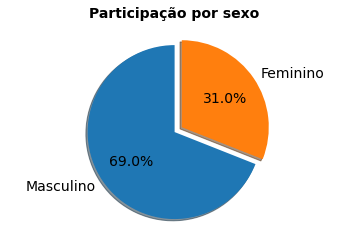

Valores absolutos:


M    276
F    124
Name: sex, dtype: int64

In [95]:
#Sabemos que sexo é uma variavel importante (conforme pesquisa Fonte), portanto esse 
#desbalanceamento pode ser um problema. Vamos acompanhar ao longo do processo
total_M = df_inicial.query('sex == "M"').groupby('sex').size()[0]

total_F = df_inicial.query('sex == "F"').groupby('sex').size()[0]


valores = [total_M,total_F]
series = ['Masculino','Feminino']


plt.axis('equal')
plt.rcParams.update({'font.size':14})
plt.rcParams["figure.figsize"] = [5,4]


plt.pie(valores,labels=series,autopct='%1.1f%%',
        explode=(0,0.1),shadow = True,startangle=90,)

plt.title("Participação por sexo",size=14,weight='demibold')
plt.show()

print('Valores absolutos:')
df_inicial['sex'].value_counts()

In [96]:
#separa primeiras colunas
df_1 = df_inicial.iloc[:, 0:3]


for ind, row in df_inicial.iterrows():
    if (df_1.loc[ind,'sex']=='M'):
        df_1.loc[ind,'man'] = 1
    else:
        df_1.loc[ind,'man'] = 0

#deleta coluna "sexo"
df_1.drop(['sex'],axis=1,inplace=True)

#transforma sexo em inteiro
df_1['man'] = df_1['man'].astype(int)

In [98]:
#seleciona as outras colunas do Dataset
df_1_2 = df_inicial.iloc[:, 716:]
df_1_2.head(3)

,class_id,soma_endo,soma_epi,soma_parede,class_desc
0,0,-3.809996e+06,-2.304811e+06,-1.769105e+06,normal
1,0,1.973591e+05,1.108307e+05,2.451851e+05,normal
2,0,-3.196860e+00,8.881557e+06,-1.306913e+06,normal


In [99]:
#Separa SPHARM
df_1_3 = df_inicial.iloc[:, 3:716]
df_1_3

#Calula soma Manual dos SPHARM detalhado
dados_soma = df_1_3.sum(axis=1,skipna=True,numeric_only=True)
coluna_soma = pd.DataFrame(data=dados_soma,columns=['soma_spharms_manual'])
coluna_soma

df_1_4 = pd.concat([coluna_soma,df_1_3], axis = 1)
df_1_4.tail(3)

,soma_spharms_manual,Spharm_1,Spharm_2,Spharm_3,Spharm_4,Spharm_5,Spharm_6,Spharm_7,Spharm_8,Spharm_9,...,Spharm_704,Spharm_705,Spharm_706,Spharm_707,Spharm_708,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713
397,-1.223793e+06,-8778.656833,-9578.976012,-3980.433446,-5960.245662,-8827.803311,-5754.876105,-1975.006261,-7098.336887,-1207.964918,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
398,-3.335071e+04,-127.196887,-5.049371,-124.475009,-160.945803,-181.699275,-199.919816,-139.060539,-41.128519,-182.435120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,-1.913077e+05,-450.401501,-122.738714,-338.262264,-466.144315,-339.253329,-779.210985,-445.468625,-334.556179,-462.754439,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset: SomaSpharm (leila) + Soma Spharm Mnual + Spharm Detalhado

In [100]:
#Junta os dois datasets
df_2 = pd.concat([df_1, df_1_2], axis = 1)
df_2 = pd.concat([df_2, df_1_4], axis = 1)


df_spharm = df_2
df_spharm.head(3)

,id,age,man,class_id,soma_endo,soma_epi,soma_parede,class_desc,soma_spharms_manual,Spharm_1,...,Spharm_704,Spharm_705,Spharm_706,Spharm_707,Spharm_708,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713
0,id001,29,1,0,-3.809996e+06,-2.304811e+06,-1.769105e+06,normal,-5.601981e+06,-7881.480247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id002,31,1,0,1.973591e+05,1.108307e+05,2.451851e+05,normal,-1.267293e+05,-567.772697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id003,27,1,0,-3.196860e+00,8.881557e+06,-1.306913e+06,normal,-1.153833e+08,-135372.767326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dataset: SomaSpharm (leila) + Soma Spharm Mnual + Houg Detalhado45

In [102]:
#Junta os dois datasets
df_2_1 = df_2.iloc[:,:9]
df_hough = pd.merge(df_2_1,df_hTotal,on=['id'])
df_hough.head(3)

#msno.bar(df_hough)

,id,age,man,class_id,soma_endo,soma_epi,soma_parede,class_desc,soma_spharms_manual,hEndo45_1,...,hPar45_1399,hPar45_1400,hPar45_1401,hPar45_1402,hPar45_1403,hPar45_1404,hPar45_1405,hPar45_1406,hPar45_1407,hPar45_1408
0,id001,29,1,0,-3.809996e+06,-2.304811e+06,-1.769105e+06,normal,-5.601981e+06,0,...,8,0,3,7,9,0,3,7,10,0
1,id002,31,1,0,1.973591e+05,1.108307e+05,2.451851e+05,normal,-1.267293e+05,0,...,8,0,3,7,9,0,3,7,10,0
2,id003,27,1,0,-3.196860e+00,8.881557e+06,-1.306913e+06,normal,-1.153833e+08,0,...,8,0,3,7,9,0,3,7,10,0


## Dataset: SomaSpharm (leila) + Soma Spharm Mnual + Houg Detalhado90

In [103]:
#Junta os dois datasets
df_2_1 = df_2.iloc[:,:9]
df_hough90 = pd.merge(df_2_1,df_hTotal90,on=['id'])
df_hough90.head(3)

,id,age,man,class_id,soma_endo,soma_epi,soma_parede,class_desc,soma_spharms_manual,hEndo90_1,...,hPar90_343,hPar90_344,hPar90_345,hPar90_346,hPar90_347,hPar90_348,hPar90_349,hPar90_350,hPar90_351,hPar90_352
0,id001,29,1,0,-3.809996e+06,-2.304811e+06,-1.769105e+06,normal,-5.601981e+06,0,...,8,0,1,3,9,0,1,3,10,0
1,id002,31,1,0,1.973591e+05,1.108307e+05,2.451851e+05,normal,-1.267293e+05,0,...,8,0,1,3,9,0,1,3,10,0
2,id003,27,1,0,-3.196860e+00,8.881557e+06,-1.306913e+06,normal,-1.153833e+08,0,...,8,0,1,3,9,0,1,3,10,0


## Dataset: SomaSpharm (leila) + Soma Spharm Mnual + Houg Detalhado45 e 90

In [104]:
#Junta os dois datasets
df_2_1 = df_2.iloc[:,:9]
df_houghTotal = pd.merge(df_2_1,df_hTotal,on=['id'])
df_houghTotal = pd.merge(df_houghTotal,df_hTotal90,on=['id'])

df_houghTotal.head(3)

,id,age,man,class_id,soma_endo,soma_epi,soma_parede,class_desc,soma_spharms_manual,hEndo45_1,...,hPar90_343,hPar90_344,hPar90_345,hPar90_346,hPar90_347,hPar90_348,hPar90_349,hPar90_350,hPar90_351,hPar90_352
0,id001,29,1,0,-3.809996e+06,-2.304811e+06,-1.769105e+06,normal,-5.601981e+06,0,...,8,0,1,3,9,0,1,3,10,0
1,id002,31,1,0,1.973591e+05,1.108307e+05,2.451851e+05,normal,-1.267293e+05,0,...,8,0,1,3,9,0,1,3,10,0
2,id003,27,1,0,-3.196860e+00,8.881557e+06,-1.306913e+06,normal,-1.153833e+08,0,...,8,0,1,3,9,0,1,3,10,0


# Define qual dataset irá utilizar

In [173]:
df_final = df_spharm
#df_final =df_houghTotal
df_final.head(3)

,id,age,man,class_id,soma_endo,soma_epi,soma_parede,class_desc,soma_spharms_manual,Spharm_1,...,Spharm_704,Spharm_705,Spharm_706,Spharm_707,Spharm_708,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713
0,id001,29,1,0,-3.809996e+06,-2.304811e+06,-1.769105e+06,normal,-5.601981e+06,-7881.480247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,id002,31,1,0,1.973591e+05,1.108307e+05,2.451851e+05,normal,-1.267293e+05,-567.772697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,id003,27,1,0,-3.196860e+00,8.881557e+06,-1.306913e+06,normal,-1.153833e+08,-135372.767326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Definição das classes utilizadas dataset

#### Dado que o numero de observações entre "sem cardiomiopatia" e "com cardimiopatia (em caso de soma CDM+CMH") ficaria desbalanceado, optamos por trabalhar com as classes nomal e CMD

In [174]:
#Verifica a quantidade de cada classe
df_final['class_desc'].value_counts()

CMH       183
CMD       116
normal    101
Name: class_desc, dtype: int64

In [175]:
#Determinando quais classes uremos utilizar
df_final_1 = df_final[df_final['class_id']!=1]
df_final_1['class_desc'].value_counts()

CMD       116
normal    101
Name: class_desc, dtype: int64

In [176]:
col_target = df_final_1[['class_id']]
col_target_ = col_target.rename(columns={'class_id':'target'})
col_target_['target'].replace(2,1,inplace=True)
col_target_.head(3)

,target
0,0
1,0
2,0


In [177]:
df_final_1 = pd.concat([df_final_1, col_target_], axis = 1)
df_final_1.head(3)

,id,age,man,class_id,soma_endo,soma_epi,soma_parede,class_desc,soma_spharms_manual,Spharm_1,...,Spharm_705,Spharm_706,Spharm_707,Spharm_708,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713,target
0,id001,29,1,0,-3.809996e+06,-2.304811e+06,-1.769105e+06,normal,-5.601981e+06,-7881.480247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id002,31,1,0,1.973591e+05,1.108307e+05,2.451851e+05,normal,-1.267293e+05,-567.772697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id003,27,1,0,-3.196860e+00,8.881557e+06,-1.306913e+06,normal,-1.153833e+08,-135372.767326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### Verificando Missing Values

In [178]:
# df_final_1.isnull().sum()

# # Para os valores abaixo consideramos a média das idades
# age1 = df_final_1[df_final_1.age.isnull()]
# age2 = df_final_1[df_final_1['age']=='--']
# age3 = df_final_1[df_final_1['age']=='N']


# #Visualizar todas as classes que iremos tratar
# age_tratar = pd.concat([age1,age2,age3])
# age_tratar


# df_final_2 = df_final_1

# #altera todos os valores para 0
# df_final_2['age'].replace('--',0,inplace=True)
# df_final_2['age'].replace('N',0,inplace=True)
# df_final_2['age'] = df_final_2['age'].fillna(0)


# df_final_2['age']=df_final_2['age'].astype(int)


# #calcula média das idades
# media_idade = int(df_final_2.age.mean())
# media_idade

# df_final_2['age'].replace(0,media_idade,inplace=True)
# df_final_3 = df_final_2



In [179]:
df_final_1.isnull().sum()

id              0
age             0
man             0
class_id        0
soma_endo       0
             ... 
Spharm_710    216
Spharm_711    216
Spharm_712    216
Spharm_713    216
target          0
Length: 723, dtype: int64

### Verificando percentual de missing por coluna

In [180]:
# É possivel notar que em muitas colunas temos apenas 1 observação preenchida
dados_vazios = (df_final_1.isnull().sum()/len(df_final_1['id']))*100
dados_vazios

id             0.000000
age            0.000000
man            0.000000
class_id       0.000000
soma_endo      0.000000
                ...    
Spharm_710    99.539171
Spharm_711    99.539171
Spharm_712    99.539171
Spharm_713    99.539171
target         0.000000
Length: 723, dtype: float64

In [181]:
#dados_vazios.tail(15)

#df_final_3['hPar_1408'].isnull().sum()

#Abaixo podemos notar a quantidade de atributos que está com 99% de suas observações vazias
#dados_nulos = pd.DataFrame(data=dados_vazios)
#dados_nulos.columns = ['vazios']
#dados_nulos.sort_values(by=['vazios'], ascending=False)

#dados_nulos[dados_nulos['vazios']>50]

### Abaixo é possivel notar que temos 412 features que estão mais de 50% vazias no datase
#dados_nulos[dados_nulos['vazios']>50].count()

#Com o gráfico abaixo é possivel notar que quando caminhamos para a direita no dataset
#cada vez mais temos ocorrencias de valores nulos
#como temos bastantes features não é possivel avaliar, dessa forma vamos avaliar por grupos

#msno.matrix(df_final_3) 

# Quando agrupamos a cada 70 atributos é possivel notar que temos valores faltanto 
# a partir da coluna 64
#msno.matrix(df_4.iloc[:, 0:70]) 

#msno.matrix(df_final_3.iloc[:, 281:]) 

### Tratando os missings para PCA:

Como verificamos na análise acima temos muitas features com valores faltando, desta forma faremos algumas tentativas de transformações de feature para tentar minizar o impacto dos valores nulos sem descaracterizar o dataset.

1. Separar o dataset entre: Atributos SPHARMS e Demais atributos;
2. Criar feature Soma de SPHARMS;

In [182]:
df_final_3 = df_final_1
df_final_3.head(3)

,id,age,man,class_id,soma_endo,soma_epi,soma_parede,class_desc,soma_spharms_manual,Spharm_1,...,Spharm_705,Spharm_706,Spharm_707,Spharm_708,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713,target
0,id001,29,1,0,-3.809996e+06,-2.304811e+06,-1.769105e+06,normal,-5.601981e+06,-7881.480247,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,id002,31,1,0,1.973591e+05,1.108307e+05,2.451851e+05,normal,-1.267293e+05,-567.772697,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,id003,27,1,0,-3.196860e+00,8.881557e+06,-1.306913e+06,normal,-1.153833e+08,-135372.767326,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [183]:
df_final_4 = df_final_3.drop(['class_id'],axis = 1)
df_final_4 = df_final_4.drop(['class_desc'],axis = 1)
df_final_4 = df_final_4.drop(['id'],axis = 1)
df_final_4.head(3)

,age,man,soma_endo,soma_epi,soma_parede,soma_spharms_manual,Spharm_1,Spharm_2,Spharm_3,Spharm_4,...,Spharm_705,Spharm_706,Spharm_707,Spharm_708,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713,target
0,29,1,-3.809996e+06,-2.304811e+06,-1.769105e+06,-5.601981e+06,-7881.480247,-5759.969698,-24465.608592,-15275.106756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,31,1,1.973591e+05,1.108307e+05,2.451851e+05,-1.267293e+05,-567.772697,-33.292309,-465.179132,-525.981010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,27,1,-3.196860e+00,8.881557e+06,-1.306913e+06,-1.153833e+08,-135372.767326,-115124.114646,-772665.053883,-292331.423079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [184]:
#AJUSTA O DATASET QUE IRÁ UTILIZAR PARA FAZER O PCA

#utilizando Hough
pca_1 = df_final_4

#df_pca_1 = df_final_4[['age','man']]
#df_pca_1

#df_pca_2 = df_final_4.iloc[:,6:]
#df_pca_2

#df_pca_3 = pd.concat([df_pca_1,df_pca_2],axis=1)
#df_pca_3


#pca_1 = df_pca_3

#FIM  Hough

#Com SPHARM
#pca_1 = df_final_4[['age','man','soma_endo','soma_epi','soma_parede','soma_spharms_manual','target']]
#pca_1 = df_final_4[['age','man','soma_endo','soma_epi','soma_parede','target']]
#pca_1 = df_final_4[['age','man','soma_endo','soma_epi','target']]
#pca_1 = df_final_4[['age','man','soma_parede','target']]


pca_1.head(3)

,age,man,soma_endo,soma_epi,soma_parede,soma_spharms_manual,Spharm_1,Spharm_2,Spharm_3,Spharm_4,...,Spharm_705,Spharm_706,Spharm_707,Spharm_708,Spharm_709,Spharm_710,Spharm_711,Spharm_712,Spharm_713,target
0,29,1,-3.809996e+06,-2.304811e+06,-1.769105e+06,-5.601981e+06,-7881.480247,-5759.969698,-24465.608592,-15275.106756,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,31,1,1.973591e+05,1.108307e+05,2.451851e+05,-1.267293e+05,-567.772697,-33.292309,-465.179132,-525.981010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,27,1,-3.196860e+00,8.881557e+06,-1.306913e+06,-1.153833e+08,-135372.767326,-115124.114646,-772665.053883,-292331.423079,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [186]:
# Separando as fetures
feat = ['age', 'man','soma_endo','soma_epi','soma_parede']

#feat = pca_1.columns[0:-1]
feat

['age', 'man', 'soma_endo', 'soma_epi', 'soma_parede']

### PCA primeira abordagem: Com soma de coeficientes harmonicos e normalizado

In [187]:

x = pca_1.loc[:, feat].values

# Separa target
y = pca_1.loc[:,['target']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [188]:
#dados normalizados
pca_1_normal = pd.DataFrame(data=x,columns = feat)

pca_1_y =  pd.DataFrame(data=y,columns = ['target'])

pca_1_normal.tail(3)
pca_1_y.tail(3)

,target
214,1
215,1
216,1


In [189]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [190]:
finalDf = pd.concat([principalDf, pca_1_y], axis = 1)
finalDf.head(3)

,principal component 1,principal component 2,target
0,-2.216197,-2.023488,0
1,0.618917,-0.902012,0
2,2.902457,-1.750494,0


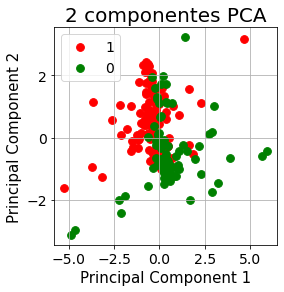

In [191]:
fig = plt.figure(figsize = (4,4))
ax = fig.add_subplot(1,1,1) 

ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 componentes PCA', fontsize = 20)

targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 60)
ax.legend(targets)
ax.grid()

In [192]:
total_explicado = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
total_explicado

0.5983313552403691

## Total informações em 2 componentes principais por abordagem:

### Teste com SomaSpharm + Soma Manual Shpharm
considerando feat = ['age', 'man','soma_endo','soma_epi','soma_parede','soma_spharms'] = 50% <br />
considerando feat = ['age', 'man','soma_endo','soma_epi','soma_parede'] = 59.8% <br />
considerando feat = ['age', 'man','soma_endo','soma_epi'] = 61.9% <br />
considerando feat = ['age', 'man','soma_parede'] = 74.4% também é possivel observar alguma boa separação no gráfico<br /><br />

### Teste com SomaSpharm + Soma Manual Shpharm + Houg Detalhado 45
considerando feat = ['age', 'man','soma_endo','soma_epi','soma_parede','soma_spharms','HOUG DETALHE'] = 19% <br />
considerando feat = ['age', 'man','HOUG DETALHE'] = 19% <br />

### Teste com SomaSpharm + Soma Manual Shpharm + Houg Detalhado 45 e 90
considerando feat = ['age', 'man','soma_endo','soma_epi','soma_parede','soma_spharms','HOUG DETALHE'] = 20% <br />
considerando feat = ['age', 'man','HOUG DETALHE'] = 20% <br />

### Conclusão:
Quando rodarmos o PCA com X = ['age', 'man','soma_endo','soma_epi','soma_parede'] conseguimos ver uma boa separação no gráfico em 2d.

### TESTE SELEÇÃO FEATURE